## Model with Greyscale 150 x 200 Resolution 

**Problem Statement :**<br> Our skin is our body's largest organ and skin cancer is the most common form of cancer. If treated early, skin cancer is highly curable. At this time, the dominant method for skin cancer diagnosis is histopathological, physically removing material and identification in a laboratory. Recognition of the pain involved may dissuade patients from seeking early treatment. Medical professionals have turned to the data science community for a tool for diagnosing skin cancer through image processing. A model that could reliably detect cancer will save lives. The problem is to develop a model that can detect cancer cells by interpreting the image data. Stakeholders in this endeavor are medical professionals and patients with skin lesions.

This project seeks to identify images of pigmented skin cells collected by medical staff. The goal of medical researchers is to create a tool that can help to determine which images are of benign vs malignant cells. The datasets are available online at Kaggle and the origin of the set is Medical University of Vienna. The data includes diagnostic information classifying the images into seven categories. Supporting documentation states the images are representatively distributed. The data is available in a wide range of resolutions from 8 x 8 pixels to 450 x 600 pixels. There are seperate notebooks for each level of resolution. Color and greyscale have seperate models as well.

This particular notebook will use monochrome images with a 150 by 200 pixel resolution-the highest resolution this equipment could accomodate. The original image files have three channels, the first of which is used for this set. In future trials, altering how the single channel is composed will make an interesting area for further investagtion. It is interesting to note differences in model performance by varying resolution and number of channels(color). All of the models are neural networks and hyperparameters are tweaked to improve performance.

### Table of Contents

[1 Importing Libraries](#1-Importing-Libraries)<br>
[2 Reading in the MetaData and Image Files](#2-Reading-in-the-MetaData-and-Image-Files)<br>
[3 DataFrame](#3-DataFrame)<br>
[4 Scaling the image data](#4-Scaling-the-image-data)<br>
[5 The Diagnosis Column](#5-The-Diagnosis-Column)<br>
[6 Unbalanced Classes](#6-Unbalanced-Classes)<br>
[7 The Target Column](#7-The-Target-Column)<br>
[8 The Features Column](#8-The-Features-Column)<br>
[9 Train Test Split](#9-Train-Test-Split)<br>
[10 Model Construction](#10-Model-Construction)<br>
[11 Feed Forward Neural Network](#11-Feed-Forward-Neural-Network)<br>
[ .    FNN Model](#FNN-Model)<br>
[12 Convolutional Neural Network](#12-Convolutional-Neural-Network)<br>
[ .    CNN Model 1](#CNN-Model-1)<br>
[ .    CNN Model 2](#CNN-Model-2)<br>
[ .    CNN Model 3](#CNN-Model-3)<br>
[ .    CNN Model 4](#CNN-Model-4)<br>
[ .    CNN Model 5](#CNN-Model-5)<br>

### 1 Importing Libraries

Collecting necessary libraries

In [1]:
import pandas as pd
import numpy as np
from numpy import reshape
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from os.path import isfile
import os


%matplotlib inline

Using TensorFlow backend.


### 2 Reading in the MetaData and Image Files

The metadata is in seperate file, this line reads in that data and puts it into a pandas dataframe.

In [2]:
skin =pd.read_csv('../../datasets/HAM10000_metadata.csv')

A column of the dataframe is created to house all the image file data to be attached to the metadata.

In [3]:
skin['images'] =[None for _ in range(len(skin['dx']))]

This code maps the filepath to the image files. Each image has it's own file in a image folder and it's own filepath. This folder is quite large- 3GB+.

In [4]:
def expand_path(p):
    if isfile('../../datasets/ALLIMAGES/' + p + '.jpg'): return '../../datasets/ALLIMAGES/' + p + '.jpg'
    
    return p 
skin['image_path'] = skin['image_id']
skin['image_path'] = skin['image_path'].apply(expand_path)


skin.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,images,image_path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,None,../../datasets/ALLIMAGES/ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,None,../../datasets/ALLIMAGES/ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,None,../../datasets/ALLIMAGES/ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,None,../../datasets/ALLIMAGES/ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,None,../../datasets/ALLIMAGES/ISIC_0031633.jpg


The Keras preprocessing library is used to load the image data, following the filepath for each image. Another Keras preprocessing library takes the image data and converts it to an array-necessary form for the model. There is also a chance to resize the image to save a step later. There are 10015 images so this step may take some time.

In [5]:

    # load the image
for i in range(len(skin['image_path'])):
    
    img = load_img(skin['image_path'][i])
    # convert to numpy array
    image = img_to_array(img)
    image.resize((150,200,1))
    print(f'Adding Image: {i}')
    skin['images'][i] = image
    
    

Adding Image: 0
Adding Image: 1
Adding Image: 2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


Adding Image: 3
Adding Image: 4
Adding Image: 5
Adding Image: 6
Adding Image: 7
Adding Image: 8
Adding Image: 9
Adding Image: 10
Adding Image: 11
Adding Image: 12
Adding Image: 13
Adding Image: 14
Adding Image: 15
Adding Image: 16
Adding Image: 17
Adding Image: 18
Adding Image: 19
Adding Image: 20
Adding Image: 21
Adding Image: 22
Adding Image: 23
Adding Image: 24
Adding Image: 25
Adding Image: 26
Adding Image: 27
Adding Image: 28
Adding Image: 29
Adding Image: 30
Adding Image: 31
Adding Image: 32
Adding Image: 33
Adding Image: 34
Adding Image: 35
Adding Image: 36
Adding Image: 37
Adding Image: 38
Adding Image: 39
Adding Image: 40
Adding Image: 41
Adding Image: 42
Adding Image: 43
Adding Image: 44
Adding Image: 45
Adding Image: 46
Adding Image: 47
Adding Image: 48
Adding Image: 49
Adding Image: 50
Adding Image: 51
Adding Image: 52
Adding Image: 53
Adding Image: 54
Adding Image: 55
Adding Image: 56
Adding Image: 57
Adding Image: 58
Adding Image: 59
Adding Image: 60
Adding Image: 61
Addi

Adding Image: 467
Adding Image: 468
Adding Image: 469
Adding Image: 470
Adding Image: 471
Adding Image: 472
Adding Image: 473
Adding Image: 474
Adding Image: 475
Adding Image: 476
Adding Image: 477
Adding Image: 478
Adding Image: 479
Adding Image: 480
Adding Image: 481
Adding Image: 482
Adding Image: 483
Adding Image: 484
Adding Image: 485
Adding Image: 486
Adding Image: 487
Adding Image: 488
Adding Image: 489
Adding Image: 490
Adding Image: 491
Adding Image: 492
Adding Image: 493
Adding Image: 494
Adding Image: 495
Adding Image: 496
Adding Image: 497
Adding Image: 498
Adding Image: 499
Adding Image: 500
Adding Image: 501
Adding Image: 502
Adding Image: 503
Adding Image: 504
Adding Image: 505
Adding Image: 506
Adding Image: 507
Adding Image: 508
Adding Image: 509
Adding Image: 510
Adding Image: 511
Adding Image: 512
Adding Image: 513
Adding Image: 514
Adding Image: 515
Adding Image: 516
Adding Image: 517
Adding Image: 518
Adding Image: 519
Adding Image: 520
Adding Image: 521
Adding Ima

Adding Image: 923
Adding Image: 924
Adding Image: 925
Adding Image: 926
Adding Image: 927
Adding Image: 928
Adding Image: 929
Adding Image: 930
Adding Image: 931
Adding Image: 932
Adding Image: 933
Adding Image: 934
Adding Image: 935
Adding Image: 936
Adding Image: 937
Adding Image: 938
Adding Image: 939
Adding Image: 940
Adding Image: 941
Adding Image: 942
Adding Image: 943
Adding Image: 944
Adding Image: 945
Adding Image: 946
Adding Image: 947
Adding Image: 948
Adding Image: 949
Adding Image: 950
Adding Image: 951
Adding Image: 952
Adding Image: 953
Adding Image: 954
Adding Image: 955
Adding Image: 956
Adding Image: 957
Adding Image: 958
Adding Image: 959
Adding Image: 960
Adding Image: 961
Adding Image: 962
Adding Image: 963
Adding Image: 964
Adding Image: 965
Adding Image: 966
Adding Image: 967
Adding Image: 968
Adding Image: 969
Adding Image: 970
Adding Image: 971
Adding Image: 972
Adding Image: 973
Adding Image: 974
Adding Image: 975
Adding Image: 976
Adding Image: 977
Adding Ima

Adding Image: 1359
Adding Image: 1360
Adding Image: 1361
Adding Image: 1362
Adding Image: 1363
Adding Image: 1364
Adding Image: 1365
Adding Image: 1366
Adding Image: 1367
Adding Image: 1368
Adding Image: 1369
Adding Image: 1370
Adding Image: 1371
Adding Image: 1372
Adding Image: 1373
Adding Image: 1374
Adding Image: 1375
Adding Image: 1376
Adding Image: 1377
Adding Image: 1378
Adding Image: 1379
Adding Image: 1380
Adding Image: 1381
Adding Image: 1382
Adding Image: 1383
Adding Image: 1384
Adding Image: 1385
Adding Image: 1386
Adding Image: 1387
Adding Image: 1388
Adding Image: 1389
Adding Image: 1390
Adding Image: 1391
Adding Image: 1392
Adding Image: 1393
Adding Image: 1394
Adding Image: 1395
Adding Image: 1396
Adding Image: 1397
Adding Image: 1398
Adding Image: 1399
Adding Image: 1400
Adding Image: 1401
Adding Image: 1402
Adding Image: 1403
Adding Image: 1404
Adding Image: 1405
Adding Image: 1406
Adding Image: 1407
Adding Image: 1408
Adding Image: 1409
Adding Image: 1410
Adding Image

Adding Image: 1791
Adding Image: 1792
Adding Image: 1793
Adding Image: 1794
Adding Image: 1795
Adding Image: 1796
Adding Image: 1797
Adding Image: 1798
Adding Image: 1799
Adding Image: 1800
Adding Image: 1801
Adding Image: 1802
Adding Image: 1803
Adding Image: 1804
Adding Image: 1805
Adding Image: 1806
Adding Image: 1807
Adding Image: 1808
Adding Image: 1809
Adding Image: 1810
Adding Image: 1811
Adding Image: 1812
Adding Image: 1813
Adding Image: 1814
Adding Image: 1815
Adding Image: 1816
Adding Image: 1817
Adding Image: 1818
Adding Image: 1819
Adding Image: 1820
Adding Image: 1821
Adding Image: 1822
Adding Image: 1823
Adding Image: 1824
Adding Image: 1825
Adding Image: 1826
Adding Image: 1827
Adding Image: 1828
Adding Image: 1829
Adding Image: 1830
Adding Image: 1831
Adding Image: 1832
Adding Image: 1833
Adding Image: 1834
Adding Image: 1835
Adding Image: 1836
Adding Image: 1837
Adding Image: 1838
Adding Image: 1839
Adding Image: 1840
Adding Image: 1841
Adding Image: 1842
Adding Image

Adding Image: 2223
Adding Image: 2224
Adding Image: 2225
Adding Image: 2226
Adding Image: 2227
Adding Image: 2228
Adding Image: 2229
Adding Image: 2230
Adding Image: 2231
Adding Image: 2232
Adding Image: 2233
Adding Image: 2234
Adding Image: 2235
Adding Image: 2236
Adding Image: 2237
Adding Image: 2238
Adding Image: 2239
Adding Image: 2240
Adding Image: 2241
Adding Image: 2242
Adding Image: 2243
Adding Image: 2244
Adding Image: 2245
Adding Image: 2246
Adding Image: 2247
Adding Image: 2248
Adding Image: 2249
Adding Image: 2250
Adding Image: 2251
Adding Image: 2252
Adding Image: 2253
Adding Image: 2254
Adding Image: 2255
Adding Image: 2256
Adding Image: 2257
Adding Image: 2258
Adding Image: 2259
Adding Image: 2260
Adding Image: 2261
Adding Image: 2262
Adding Image: 2263
Adding Image: 2264
Adding Image: 2265
Adding Image: 2266
Adding Image: 2267
Adding Image: 2268
Adding Image: 2269
Adding Image: 2270
Adding Image: 2271
Adding Image: 2272
Adding Image: 2273
Adding Image: 2274
Adding Image

Adding Image: 2656
Adding Image: 2657
Adding Image: 2658
Adding Image: 2659
Adding Image: 2660
Adding Image: 2661
Adding Image: 2662
Adding Image: 2663
Adding Image: 2664
Adding Image: 2665
Adding Image: 2666
Adding Image: 2667
Adding Image: 2668
Adding Image: 2669
Adding Image: 2670
Adding Image: 2671
Adding Image: 2672
Adding Image: 2673
Adding Image: 2674
Adding Image: 2675
Adding Image: 2676
Adding Image: 2677
Adding Image: 2678
Adding Image: 2679
Adding Image: 2680
Adding Image: 2681
Adding Image: 2682
Adding Image: 2683
Adding Image: 2684
Adding Image: 2685
Adding Image: 2686
Adding Image: 2687
Adding Image: 2688
Adding Image: 2689
Adding Image: 2690
Adding Image: 2691
Adding Image: 2692
Adding Image: 2693
Adding Image: 2694
Adding Image: 2695
Adding Image: 2696
Adding Image: 2697
Adding Image: 2698
Adding Image: 2699
Adding Image: 2700
Adding Image: 2701
Adding Image: 2702
Adding Image: 2703
Adding Image: 2704
Adding Image: 2705
Adding Image: 2706
Adding Image: 2707
Adding Image

Adding Image: 3091
Adding Image: 3092
Adding Image: 3093
Adding Image: 3094
Adding Image: 3095
Adding Image: 3096
Adding Image: 3097
Adding Image: 3098
Adding Image: 3099
Adding Image: 3100
Adding Image: 3101
Adding Image: 3102
Adding Image: 3103
Adding Image: 3104
Adding Image: 3105
Adding Image: 3106
Adding Image: 3107
Adding Image: 3108
Adding Image: 3109
Adding Image: 3110
Adding Image: 3111
Adding Image: 3112
Adding Image: 3113
Adding Image: 3114
Adding Image: 3115
Adding Image: 3116
Adding Image: 3117
Adding Image: 3118
Adding Image: 3119
Adding Image: 3120
Adding Image: 3121
Adding Image: 3122
Adding Image: 3123
Adding Image: 3124
Adding Image: 3125
Adding Image: 3126
Adding Image: 3127
Adding Image: 3128
Adding Image: 3129
Adding Image: 3130
Adding Image: 3131
Adding Image: 3132
Adding Image: 3133
Adding Image: 3134
Adding Image: 3135
Adding Image: 3136
Adding Image: 3137
Adding Image: 3138
Adding Image: 3139
Adding Image: 3140
Adding Image: 3141
Adding Image: 3142
Adding Image

Adding Image: 3525
Adding Image: 3526
Adding Image: 3527
Adding Image: 3528
Adding Image: 3529
Adding Image: 3530
Adding Image: 3531
Adding Image: 3532
Adding Image: 3533
Adding Image: 3534
Adding Image: 3535
Adding Image: 3536
Adding Image: 3537
Adding Image: 3538
Adding Image: 3539
Adding Image: 3540
Adding Image: 3541
Adding Image: 3542
Adding Image: 3543
Adding Image: 3544
Adding Image: 3545
Adding Image: 3546
Adding Image: 3547
Adding Image: 3548
Adding Image: 3549
Adding Image: 3550
Adding Image: 3551
Adding Image: 3552
Adding Image: 3553
Adding Image: 3554
Adding Image: 3555
Adding Image: 3556
Adding Image: 3557
Adding Image: 3558
Adding Image: 3559
Adding Image: 3560
Adding Image: 3561
Adding Image: 3562
Adding Image: 3563
Adding Image: 3564
Adding Image: 3565
Adding Image: 3566
Adding Image: 3567
Adding Image: 3568
Adding Image: 3569
Adding Image: 3570
Adding Image: 3571
Adding Image: 3572
Adding Image: 3573
Adding Image: 3574
Adding Image: 3575
Adding Image: 3576
Adding Image

Adding Image: 3957
Adding Image: 3958
Adding Image: 3959
Adding Image: 3960
Adding Image: 3961
Adding Image: 3962
Adding Image: 3963
Adding Image: 3964
Adding Image: 3965
Adding Image: 3966
Adding Image: 3967
Adding Image: 3968
Adding Image: 3969
Adding Image: 3970
Adding Image: 3971
Adding Image: 3972
Adding Image: 3973
Adding Image: 3974
Adding Image: 3975
Adding Image: 3976
Adding Image: 3977
Adding Image: 3978
Adding Image: 3979
Adding Image: 3980
Adding Image: 3981
Adding Image: 3982
Adding Image: 3983
Adding Image: 3984
Adding Image: 3985
Adding Image: 3986
Adding Image: 3987
Adding Image: 3988
Adding Image: 3989
Adding Image: 3990
Adding Image: 3991
Adding Image: 3992
Adding Image: 3993
Adding Image: 3994
Adding Image: 3995
Adding Image: 3996
Adding Image: 3997
Adding Image: 3998
Adding Image: 3999
Adding Image: 4000
Adding Image: 4001
Adding Image: 4002
Adding Image: 4003
Adding Image: 4004
Adding Image: 4005
Adding Image: 4006
Adding Image: 4007
Adding Image: 4008
Adding Image

Adding Image: 4389
Adding Image: 4390
Adding Image: 4391
Adding Image: 4392
Adding Image: 4393
Adding Image: 4394
Adding Image: 4395
Adding Image: 4396
Adding Image: 4397
Adding Image: 4398
Adding Image: 4399
Adding Image: 4400
Adding Image: 4401
Adding Image: 4402
Adding Image: 4403
Adding Image: 4404
Adding Image: 4405
Adding Image: 4406
Adding Image: 4407
Adding Image: 4408
Adding Image: 4409
Adding Image: 4410
Adding Image: 4411
Adding Image: 4412
Adding Image: 4413
Adding Image: 4414
Adding Image: 4415
Adding Image: 4416
Adding Image: 4417
Adding Image: 4418
Adding Image: 4419
Adding Image: 4420
Adding Image: 4421
Adding Image: 4422
Adding Image: 4423
Adding Image: 4424
Adding Image: 4425
Adding Image: 4426
Adding Image: 4427
Adding Image: 4428
Adding Image: 4429
Adding Image: 4430
Adding Image: 4431
Adding Image: 4432
Adding Image: 4433
Adding Image: 4434
Adding Image: 4435
Adding Image: 4436
Adding Image: 4437
Adding Image: 4438
Adding Image: 4439
Adding Image: 4440
Adding Image

Adding Image: 4822
Adding Image: 4823
Adding Image: 4824
Adding Image: 4825
Adding Image: 4826
Adding Image: 4827
Adding Image: 4828
Adding Image: 4829
Adding Image: 4830
Adding Image: 4831
Adding Image: 4832
Adding Image: 4833
Adding Image: 4834
Adding Image: 4835
Adding Image: 4836
Adding Image: 4837
Adding Image: 4838
Adding Image: 4839
Adding Image: 4840
Adding Image: 4841
Adding Image: 4842
Adding Image: 4843
Adding Image: 4844
Adding Image: 4845
Adding Image: 4846
Adding Image: 4847
Adding Image: 4848
Adding Image: 4849
Adding Image: 4850
Adding Image: 4851
Adding Image: 4852
Adding Image: 4853
Adding Image: 4854
Adding Image: 4855
Adding Image: 4856
Adding Image: 4857
Adding Image: 4858
Adding Image: 4859
Adding Image: 4860
Adding Image: 4861
Adding Image: 4862
Adding Image: 4863
Adding Image: 4864
Adding Image: 4865
Adding Image: 4866
Adding Image: 4867
Adding Image: 4868
Adding Image: 4869
Adding Image: 4870
Adding Image: 4871
Adding Image: 4872
Adding Image: 4873
Adding Image

Adding Image: 5255
Adding Image: 5256
Adding Image: 5257
Adding Image: 5258
Adding Image: 5259
Adding Image: 5260
Adding Image: 5261
Adding Image: 5262
Adding Image: 5263
Adding Image: 5264
Adding Image: 5265
Adding Image: 5266
Adding Image: 5267
Adding Image: 5268
Adding Image: 5269
Adding Image: 5270
Adding Image: 5271
Adding Image: 5272
Adding Image: 5273
Adding Image: 5274
Adding Image: 5275
Adding Image: 5276
Adding Image: 5277
Adding Image: 5278
Adding Image: 5279
Adding Image: 5280
Adding Image: 5281
Adding Image: 5282
Adding Image: 5283
Adding Image: 5284
Adding Image: 5285
Adding Image: 5286
Adding Image: 5287
Adding Image: 5288
Adding Image: 5289
Adding Image: 5290
Adding Image: 5291
Adding Image: 5292
Adding Image: 5293
Adding Image: 5294
Adding Image: 5295
Adding Image: 5296
Adding Image: 5297
Adding Image: 5298
Adding Image: 5299
Adding Image: 5300
Adding Image: 5301
Adding Image: 5302
Adding Image: 5303
Adding Image: 5304
Adding Image: 5305
Adding Image: 5306
Adding Image

Adding Image: 5690
Adding Image: 5691
Adding Image: 5692
Adding Image: 5693
Adding Image: 5694
Adding Image: 5695
Adding Image: 5696
Adding Image: 5697
Adding Image: 5698
Adding Image: 5699
Adding Image: 5700
Adding Image: 5701
Adding Image: 5702
Adding Image: 5703
Adding Image: 5704
Adding Image: 5705
Adding Image: 5706
Adding Image: 5707
Adding Image: 5708
Adding Image: 5709
Adding Image: 5710
Adding Image: 5711
Adding Image: 5712
Adding Image: 5713
Adding Image: 5714
Adding Image: 5715
Adding Image: 5716
Adding Image: 5717
Adding Image: 5718
Adding Image: 5719
Adding Image: 5720
Adding Image: 5721
Adding Image: 5722
Adding Image: 5723
Adding Image: 5724
Adding Image: 5725
Adding Image: 5726
Adding Image: 5727
Adding Image: 5728
Adding Image: 5729
Adding Image: 5730
Adding Image: 5731
Adding Image: 5732
Adding Image: 5733
Adding Image: 5734
Adding Image: 5735
Adding Image: 5736
Adding Image: 5737
Adding Image: 5738
Adding Image: 5739
Adding Image: 5740
Adding Image: 5741
Adding Image

Adding Image: 6123
Adding Image: 6124
Adding Image: 6125
Adding Image: 6126
Adding Image: 6127
Adding Image: 6128
Adding Image: 6129
Adding Image: 6130
Adding Image: 6131
Adding Image: 6132
Adding Image: 6133
Adding Image: 6134
Adding Image: 6135
Adding Image: 6136
Adding Image: 6137
Adding Image: 6138
Adding Image: 6139
Adding Image: 6140
Adding Image: 6141
Adding Image: 6142
Adding Image: 6143
Adding Image: 6144
Adding Image: 6145
Adding Image: 6146
Adding Image: 6147
Adding Image: 6148
Adding Image: 6149
Adding Image: 6150
Adding Image: 6151
Adding Image: 6152
Adding Image: 6153
Adding Image: 6154
Adding Image: 6155
Adding Image: 6156
Adding Image: 6157
Adding Image: 6158
Adding Image: 6159
Adding Image: 6160
Adding Image: 6161
Adding Image: 6162
Adding Image: 6163
Adding Image: 6164
Adding Image: 6165
Adding Image: 6166
Adding Image: 6167
Adding Image: 6168
Adding Image: 6169
Adding Image: 6170
Adding Image: 6171
Adding Image: 6172
Adding Image: 6173
Adding Image: 6174
Adding Image

Adding Image: 6556
Adding Image: 6557
Adding Image: 6558
Adding Image: 6559
Adding Image: 6560
Adding Image: 6561
Adding Image: 6562
Adding Image: 6563
Adding Image: 6564
Adding Image: 6565
Adding Image: 6566
Adding Image: 6567
Adding Image: 6568
Adding Image: 6569
Adding Image: 6570
Adding Image: 6571
Adding Image: 6572
Adding Image: 6573
Adding Image: 6574
Adding Image: 6575
Adding Image: 6576
Adding Image: 6577
Adding Image: 6578
Adding Image: 6579
Adding Image: 6580
Adding Image: 6581
Adding Image: 6582
Adding Image: 6583
Adding Image: 6584
Adding Image: 6585
Adding Image: 6586
Adding Image: 6587
Adding Image: 6588
Adding Image: 6589
Adding Image: 6590
Adding Image: 6591
Adding Image: 6592
Adding Image: 6593
Adding Image: 6594
Adding Image: 6595
Adding Image: 6596
Adding Image: 6597
Adding Image: 6598
Adding Image: 6599
Adding Image: 6600
Adding Image: 6601
Adding Image: 6602
Adding Image: 6603
Adding Image: 6604
Adding Image: 6605
Adding Image: 6606
Adding Image: 6607
Adding Image

Adding Image: 6990
Adding Image: 6991
Adding Image: 6992
Adding Image: 6993
Adding Image: 6994
Adding Image: 6995
Adding Image: 6996
Adding Image: 6997
Adding Image: 6998
Adding Image: 6999
Adding Image: 7000
Adding Image: 7001
Adding Image: 7002
Adding Image: 7003
Adding Image: 7004
Adding Image: 7005
Adding Image: 7006
Adding Image: 7007
Adding Image: 7008
Adding Image: 7009
Adding Image: 7010
Adding Image: 7011
Adding Image: 7012
Adding Image: 7013
Adding Image: 7014
Adding Image: 7015
Adding Image: 7016
Adding Image: 7017
Adding Image: 7018
Adding Image: 7019
Adding Image: 7020
Adding Image: 7021
Adding Image: 7022
Adding Image: 7023
Adding Image: 7024
Adding Image: 7025
Adding Image: 7026
Adding Image: 7027
Adding Image: 7028
Adding Image: 7029
Adding Image: 7030
Adding Image: 7031
Adding Image: 7032
Adding Image: 7033
Adding Image: 7034
Adding Image: 7035
Adding Image: 7036
Adding Image: 7037
Adding Image: 7038
Adding Image: 7039
Adding Image: 7040
Adding Image: 7041
Adding Image

Adding Image: 7424
Adding Image: 7425
Adding Image: 7426
Adding Image: 7427
Adding Image: 7428
Adding Image: 7429
Adding Image: 7430
Adding Image: 7431
Adding Image: 7432
Adding Image: 7433
Adding Image: 7434
Adding Image: 7435
Adding Image: 7436
Adding Image: 7437
Adding Image: 7438
Adding Image: 7439
Adding Image: 7440
Adding Image: 7441
Adding Image: 7442
Adding Image: 7443
Adding Image: 7444
Adding Image: 7445
Adding Image: 7446
Adding Image: 7447
Adding Image: 7448
Adding Image: 7449
Adding Image: 7450
Adding Image: 7451
Adding Image: 7452
Adding Image: 7453
Adding Image: 7454
Adding Image: 7455
Adding Image: 7456
Adding Image: 7457
Adding Image: 7458
Adding Image: 7459
Adding Image: 7460
Adding Image: 7461
Adding Image: 7462
Adding Image: 7463
Adding Image: 7464
Adding Image: 7465
Adding Image: 7466
Adding Image: 7467
Adding Image: 7468
Adding Image: 7469
Adding Image: 7470
Adding Image: 7471
Adding Image: 7472
Adding Image: 7473
Adding Image: 7474
Adding Image: 7475
Adding Image

Adding Image: 7856
Adding Image: 7857
Adding Image: 7858
Adding Image: 7859
Adding Image: 7860
Adding Image: 7861
Adding Image: 7862
Adding Image: 7863
Adding Image: 7864
Adding Image: 7865
Adding Image: 7866
Adding Image: 7867
Adding Image: 7868
Adding Image: 7869
Adding Image: 7870
Adding Image: 7871
Adding Image: 7872
Adding Image: 7873
Adding Image: 7874
Adding Image: 7875
Adding Image: 7876
Adding Image: 7877
Adding Image: 7878
Adding Image: 7879
Adding Image: 7880
Adding Image: 7881
Adding Image: 7882
Adding Image: 7883
Adding Image: 7884
Adding Image: 7885
Adding Image: 7886
Adding Image: 7887
Adding Image: 7888
Adding Image: 7889
Adding Image: 7890
Adding Image: 7891
Adding Image: 7892
Adding Image: 7893
Adding Image: 7894
Adding Image: 7895
Adding Image: 7896
Adding Image: 7897
Adding Image: 7898
Adding Image: 7899
Adding Image: 7900
Adding Image: 7901
Adding Image: 7902
Adding Image: 7903
Adding Image: 7904
Adding Image: 7905
Adding Image: 7906
Adding Image: 7907
Adding Image

Adding Image: 8290
Adding Image: 8291
Adding Image: 8292
Adding Image: 8293
Adding Image: 8294
Adding Image: 8295
Adding Image: 8296
Adding Image: 8297
Adding Image: 8298
Adding Image: 8299
Adding Image: 8300
Adding Image: 8301
Adding Image: 8302
Adding Image: 8303
Adding Image: 8304
Adding Image: 8305
Adding Image: 8306
Adding Image: 8307
Adding Image: 8308
Adding Image: 8309
Adding Image: 8310
Adding Image: 8311
Adding Image: 8312
Adding Image: 8313
Adding Image: 8314
Adding Image: 8315
Adding Image: 8316
Adding Image: 8317
Adding Image: 8318
Adding Image: 8319
Adding Image: 8320
Adding Image: 8321
Adding Image: 8322
Adding Image: 8323
Adding Image: 8324
Adding Image: 8325
Adding Image: 8326
Adding Image: 8327
Adding Image: 8328
Adding Image: 8329
Adding Image: 8330
Adding Image: 8331
Adding Image: 8332
Adding Image: 8333
Adding Image: 8334
Adding Image: 8335
Adding Image: 8336
Adding Image: 8337
Adding Image: 8338
Adding Image: 8339
Adding Image: 8340
Adding Image: 8341
Adding Image

Adding Image: 8722
Adding Image: 8723
Adding Image: 8724
Adding Image: 8725
Adding Image: 8726
Adding Image: 8727
Adding Image: 8728
Adding Image: 8729
Adding Image: 8730
Adding Image: 8731
Adding Image: 8732
Adding Image: 8733
Adding Image: 8734
Adding Image: 8735
Adding Image: 8736
Adding Image: 8737
Adding Image: 8738
Adding Image: 8739
Adding Image: 8740
Adding Image: 8741
Adding Image: 8742
Adding Image: 8743
Adding Image: 8744
Adding Image: 8745
Adding Image: 8746
Adding Image: 8747
Adding Image: 8748
Adding Image: 8749
Adding Image: 8750
Adding Image: 8751
Adding Image: 8752
Adding Image: 8753
Adding Image: 8754
Adding Image: 8755
Adding Image: 8756
Adding Image: 8757
Adding Image: 8758
Adding Image: 8759
Adding Image: 8760
Adding Image: 8761
Adding Image: 8762
Adding Image: 8763
Adding Image: 8764
Adding Image: 8765
Adding Image: 8766
Adding Image: 8767
Adding Image: 8768
Adding Image: 8769
Adding Image: 8770
Adding Image: 8771
Adding Image: 8772
Adding Image: 8773
Adding Image

Adding Image: 9155
Adding Image: 9156
Adding Image: 9157
Adding Image: 9158
Adding Image: 9159
Adding Image: 9160
Adding Image: 9161
Adding Image: 9162
Adding Image: 9163
Adding Image: 9164
Adding Image: 9165
Adding Image: 9166
Adding Image: 9167
Adding Image: 9168
Adding Image: 9169
Adding Image: 9170
Adding Image: 9171
Adding Image: 9172
Adding Image: 9173
Adding Image: 9174
Adding Image: 9175
Adding Image: 9176
Adding Image: 9177
Adding Image: 9178
Adding Image: 9179
Adding Image: 9180
Adding Image: 9181
Adding Image: 9182
Adding Image: 9183
Adding Image: 9184
Adding Image: 9185
Adding Image: 9186
Adding Image: 9187
Adding Image: 9188
Adding Image: 9189
Adding Image: 9190
Adding Image: 9191
Adding Image: 9192
Adding Image: 9193
Adding Image: 9194
Adding Image: 9195
Adding Image: 9196
Adding Image: 9197
Adding Image: 9198
Adding Image: 9199
Adding Image: 9200
Adding Image: 9201
Adding Image: 9202
Adding Image: 9203
Adding Image: 9204
Adding Image: 9205
Adding Image: 9206
Adding Image

Adding Image: 9589
Adding Image: 9590
Adding Image: 9591
Adding Image: 9592
Adding Image: 9593
Adding Image: 9594
Adding Image: 9595
Adding Image: 9596
Adding Image: 9597
Adding Image: 9598
Adding Image: 9599
Adding Image: 9600
Adding Image: 9601
Adding Image: 9602
Adding Image: 9603
Adding Image: 9604
Adding Image: 9605
Adding Image: 9606
Adding Image: 9607
Adding Image: 9608
Adding Image: 9609
Adding Image: 9610
Adding Image: 9611
Adding Image: 9612
Adding Image: 9613
Adding Image: 9614
Adding Image: 9615
Adding Image: 9616
Adding Image: 9617
Adding Image: 9618
Adding Image: 9619
Adding Image: 9620
Adding Image: 9621
Adding Image: 9622
Adding Image: 9623
Adding Image: 9624
Adding Image: 9625
Adding Image: 9626
Adding Image: 9627
Adding Image: 9628
Adding Image: 9629
Adding Image: 9630
Adding Image: 9631
Adding Image: 9632
Adding Image: 9633
Adding Image: 9634
Adding Image: 9635
Adding Image: 9636
Adding Image: 9637
Adding Image: 9638
Adding Image: 9639
Adding Image: 9640
Adding Image

This line writes the image data to a csv file.

In [6]:
#skin.to_csv("../../datasets/skin150x200x1.csv")  


### 3 DataFrame

This is the beginning of the fully assembled DataFrame, the model will use the images column and the diagnosis(dx) column.

In [7]:
skin.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,images,image_path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,"[[[188.0], [147.0], [191.0], [186.0], [148.0],...",../../datasets/ALLIMAGES/ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,"[[[25.0], [15.0], [23.0], [25.0], [14.0], [22....",../../datasets/ALLIMAGES/ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,"[[[186.0], [128.0], [140.0], [188.0], [128.0],...",../../datasets/ALLIMAGES/ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,"[[[24.0], [9.0], [16.0], [22.0], [11.0], [15.0...",../../datasets/ALLIMAGES/ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,"[[[122.0], [80.0], [102.0], [124.0], [82.0], [...",../../datasets/ALLIMAGES/ISIC_0031633.jpg


### 4 Scaling the image data

The image data is converted to arrays of arrays of values for each image, each pixel having a seperate value. The values range from 0 to 255 depending on intensity. The neural models require scaled data and this can be accomplished by dividing each value by the maximum of 255, In this way, all the values will have a new range between zero and one.



In [8]:
# This is how the data is scaled
skin['images'] = skin['images']/255

### 5 The Diagnosis Column

The target is the diagnosis column, the objective predicting cancer correctly , mel indicates cancer(melanoma) and bcc indicates basal cell carcinoma. Malignant contains all the malignant observations(mel and bcc) Benign contains the balance of possible diagnosis. 

In [9]:
malignant=skin[(skin['dx']=='mel')| (skin['dx']=='bcc')]
malignant.shape

(1627, 9)

In [10]:
benign= skin[(skin['dx']=='df')|(skin['dx']=='nv')|(skin['dx']=='bkl')|(skin['dx']=='vasc')|(skin['dx']=='akiec')]
benign.shape

(8388, 9)

### 6 Unbalanced Classes

There are many more benign images than malignant and to avoid unbalanced classes, the benign images are shuffled and the top 1627 are chosen.

In [11]:
benign = benign.sample(benign.shape[0],np.random.seed(42), replace = True)
benign.shape

(8388, 9)

Target Distribution Malignant and Benign are not balanced. A subset will be needed to make a balance set.

The malignant diagnosis is assigned a value of 1


In [12]:
malignant['dx']=1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


The benign diagnosis is assigned a value of 0. This will be a binary classification model.

In [13]:
benign['dx']=0


The equal size malignant and benign samples are joined together, creating a balanced class set for the model.

In [14]:
skin_equal = pd.concat((malignant,benign.head(1627)))

In [15]:
skin_equal.shape

(3254, 9)

### 7 The Target Column

The target is the diagnosis column of the equal dataframe.

In [16]:
y = skin_equal['dx']

### 8 The Features Column

The image ID is set as the index and all of the columns except the images are dropped. The image column will become the features for the model.

In [17]:
skin_equal.set_index('image_id', inplace = True)

In [18]:
X = skin_equal.drop(columns=['lesion_id','dx','dx_type',
                    'age', 'sex','localization','image_path'])

This arranges the features into the correct dimensionality for the model, by converting the image data to a list and then to an array.

In [19]:

X = np.asarray(X['images'].tolist())

### 9 Train Test Split

The data is split into a training set and a testing set so that model performance can be evaluated on unseen data.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                     y,
                                                    random_state=42,
                                                    stratify=y)




The model requires the feature data to be numpy array

In [21]:
type(X_train)



numpy.ndarray

In [22]:
X_train.shape

(2440, 150, 200, 1)

In [23]:
X_train[0].shape



(150, 200, 1)

Looking at X_train first entry

In [24]:
X_train[0]


array([[[0.56078434],
        [0.44705883],
        [0.5254902 ],
        ...,
        [0.47843137],
        [0.6117647 ],
        [0.4509804 ]],

       [[0.48235294],
        [0.6       ],
        [0.43529412],
        ...,
        [0.49411765],
        [0.5294118 ],
        [0.654902  ]],

       [[0.49411765],
        [0.50980395],
        [0.6784314 ],
        ...,
        [0.7176471 ],
        [0.5529412 ],
        [0.64705884]],

       ...,

       [[0.7176471 ],
        [0.5882353 ],
        [0.69411767],
        ...,
        [0.6431373 ],
        [0.74509805],
        [0.5529412 ]],

       [[0.6392157 ],
        [0.7607843 ],
        [0.5686275 ],
        ...,
        [0.4745098 ],
        [0.4627451 ],
        [0.6745098 ]],

       [[0.47843137],
        [0.4509804 ],
        [0.6745098 ],
        ...,
        [0.7137255 ],
        [0.5176471 ],
        [0.52156866]]], dtype=float32)

Checking shape of X_train and y_train now

In [25]:
X_test.shape


(814, 150, 200, 1)

In [26]:
X_train.shape

(2440, 150, 200, 1)

In [27]:
y_train.shape 


(2440,)

### 10 Model Construction

The features and target are prepared, so the modeling can commence. Neural networks are a branch of models that are known to be able to handle image data well. The most basic Neural Network is the Feed Forward Network and this makes a good starting point as other networks build on this framework. The nodes of the dense layer are interconnected to many other nodes and so the model can learn which connections are important.

### 11 Feed Forward Neural Network

Starting with Feed Forward Neural Network, this model has a flattening layer and three densely connected layers. Evaluation methods are binary crossentropy for loss and accuracy to gauge model performance. Accuracy is measured against a 50% baseline because we have balanced classes. The models are given 10 epochs to see what they can learn.

#### FNN Model

In [28]:
model = Sequential()

model.add(Flatten(input_shape=(150, 200, 1)))

model.add(Dense(128, input_shape=(150, 200, 1), activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

history = model.fit(X_train,
                    y_train, 
                    batch_size=16,
                    validation_data=(X_test, y_test),
                    epochs=10,
                    verbose=1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 2440 samples, validate on 814 samples
Epoch 1/10
2440/2440 [==============================] - 8s 3ms/step - loss: 7.8826 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 2/10
2440/2440 [==============================] - 8s 3ms/step - loss: 7.9712 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 3/10
2440/2440 [==============================] - 8s 3ms/step - loss: 7.9712 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 4/10
2440/2440 [==============================] - 8s 3ms/step - loss: 7.9712 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 5/10
2440/2440 [==============================] - 7s 3ms/step - loss: 7.9712 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 6/10
2440/2440 [==============================] - 8s 3ms/step - loss: 7.9712 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 7/10
2440/2440 [=======

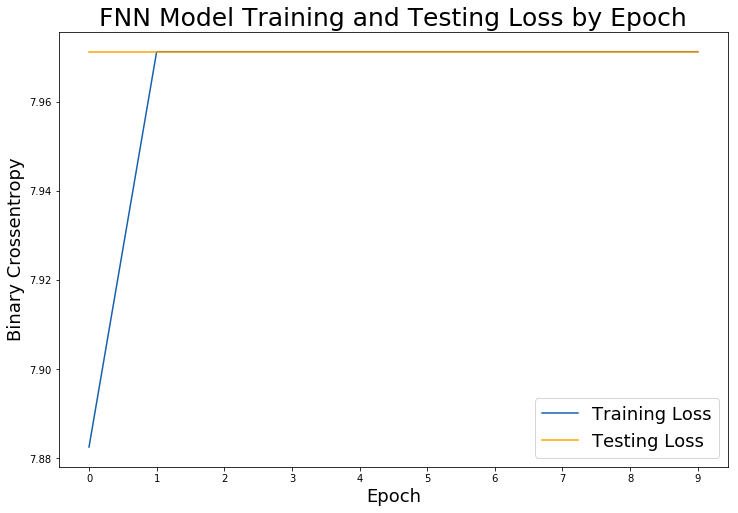

In [29]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('FNN Model Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Binary Crossentropy', fontsize = 18)
plt.xticks([0, 1, 2, 3, 4,5,6,7,8,9])

plt.legend(fontsize = 18);

This chart shows the model loss performance, it is preferable when the two lines move in tandem with a downward trajectory with little space in between the lines.

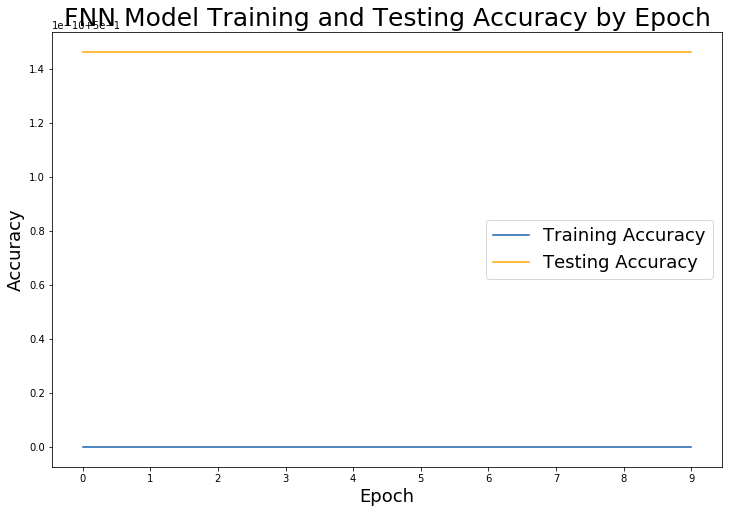

In [30]:
# Check out our train accuracy and test accuracy over epochs.
train_accuracy = history.history['acc']
test_accuracy = history.history['val_acc']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Accuracy', color='#185fad')
plt.plot(test_accuracy, label='Testing Accuracy', color='orange')

# Set title
plt.title('FNN Model Training and Testing Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Accuracy', fontsize = 18)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

plt.legend(fontsize = 18);

This chart shows the model accuracy, it is preferable when the two lines move in tandem with a upward trajectory with little space in between the lines.



In [31]:
# Evaluate model on test data.
score = model.evaluate(X_test, y_test, verbose=0)
labels = model.metrics_names

# Show model performance.
print(f'{labels[0]}: {score[0]}')
print(f'{labels[1]}: {score[1]}')

model.summary()

loss: 7.971192856678506
acc: 0.5000000001464487
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3840128   
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 3,844,289
Trainable params: 3,844,289
Non-trainable params: 0
_________________________________________________________________


This table shows the model's performance and a summary of the model's composition.

### Convolutional Neural Network

Convolutional Neural Networks have many hyperparameters that can be tuned to improve model performance. The first one has 2 convolutional layers, 2 pooling layers, and 2 dense layers

#### CNN Model 1 

In [32]:
# Instantiate a CNN.
cnn_model = Sequential()

# Add a convolutional layer.

cnn_model.add(Conv2D(filters = 6,     # number of filters
                     kernel_size = 3, # height/width of filter
                     activation = 'relu', # activation function 
                     input_shape = (150, 200, 1))) # shape of input (image)

# dimensions of region of pooling
cnn_model.add(MaxPooling2D(pool_size=(2,2))) 

cnn_model.add(Conv2D(16,
                     kernel_size = 3,
                     activation='relu'))
# adding another of region of pooling
cnn_model.add(MaxPooling2D(pool_size=(2,2))) 


cnn_model.add(Flatten())

# Add a densely-connected layer with 128 neurons.
cnn_model.add(Dense(128, activation='relu'))

# Add a final layer with 1 neuron.
cnn_model.add(Dense(1, activation='sigmoid'))

cnn_model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

# Fit model on training data
history=cnn_model.fit(X_train,
               y_train,
              batch_size=256,
              validation_data=(X_test, y_test),        
              epochs=10,
               verbose=1)

Train on 2440 samples, validate on 814 samples
Epoch 1/10
2440/2440 [==============================] - 30s 12ms/step - loss: 0.8488 - acc: 0.5590 - val_loss: 0.6754 - val_acc: 0.6278
Epoch 2/10
2440/2440 [==============================] - 27s 11ms/step - loss: 0.5761 - acc: 0.6898 - val_loss: 0.5860 - val_acc: 0.7015
Epoch 3/10
2440/2440 [==============================] - 27s 11ms/step - loss: 0.5625 - acc: 0.6898 - val_loss: 0.5769 - val_acc: 0.6634
Epoch 4/10
2440/2440 [==============================] - 25s 10ms/step - loss: 0.5495 - acc: 0.6967 - val_loss: 0.5574 - val_acc: 0.7039
Epoch 5/10
2440/2440 [==============================] - 25s 10ms/step - loss: 0.5467 - acc: 0.7025 - val_loss: 0.5525 - val_acc: 0.7088
Epoch 6/10
2440/2440 [==============================] - 24s 10ms/step - loss: 0.5397 - acc: 0.7053 - val_loss: 0.5462 - val_acc: 0.7064
Epoch 7/10
2440/2440 [==============================] - 24s 10ms/step - loss: 0.5315 - acc: 0.7057 - val_loss: 0.5501 - val_acc: 0.7015
E

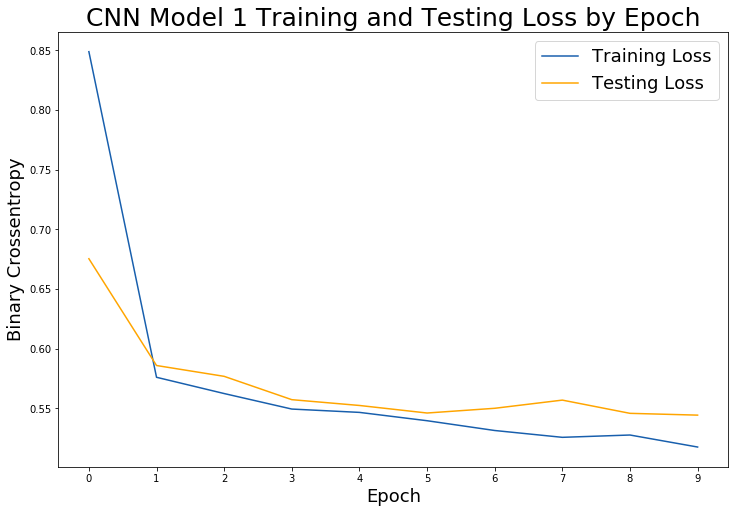

In [33]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('CNN Model 1 Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Binary Crossentropy', fontsize = 18)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

plt.legend(fontsize = 18);

This chart shows the model loss performance, it is preferable when the two lines move in tandem with a downward trajectory with little space in between the lines.

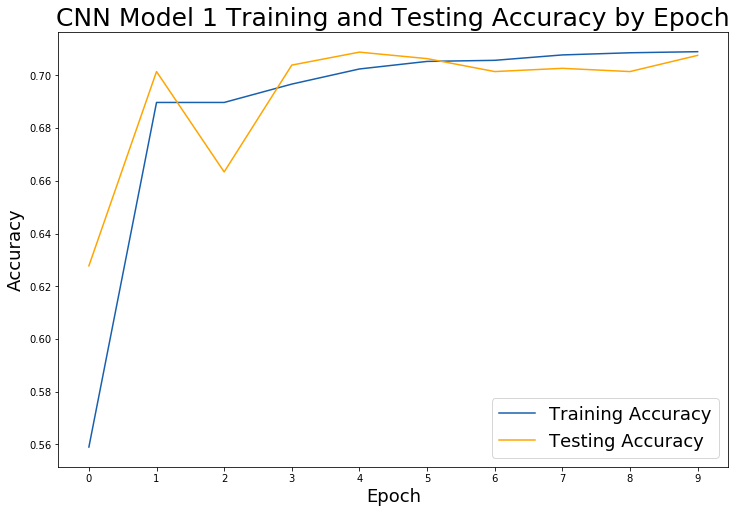

In [34]:
# Check out our train accuracy and test accuracy over epochs.
train_accuracy = history.history['acc']
test_accuracy = history.history['val_acc']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Accuracy', color='#185fad')
plt.plot(test_accuracy, label='Testing Accuracy', color='orange')

# Set title
plt.title('CNN Model 1 Training and Testing Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Accuracy', fontsize = 18)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

plt.legend(fontsize = 18);

This chart shows the model accuracy, it is preferable when the two lines move in tandem with a upward trajectory with little space in between the lines.



In [35]:
cnn_model.summary()

# Evaluate model on test data
cnn_score = cnn_model.evaluate(X_test, y_test, verbose=0)
cnn_labels = cnn_model.metrics_names

# Compare CNN and FFNN models.
print(f'CNN {cnn_labels[0]}  : {cnn_score[0]}')
print(f'CNN {cnn_labels[1]}   : {cnn_score[1]}')
print()
print(f'FFNN {labels[0]} : {score[0]}')
print(f'FFNN {labels[1]}  : {score[1]}')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 198, 6)       60        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 99, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 97, 16)        880       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 48, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 27648)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               3539072   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total para

This table shows the model's performance and a summary of the model's composition.

#### CNN Model 2

In [36]:
# Instantiate a CNN.
cnn_model_2 = Sequential()

# Add a convolutional layer.
cnn_model_2.add(Conv2D(filters = 6,         # number of filters
                     kernel_size = 3,        # height/width of filter
                     activation='relu',      # activation function 
                     input_shape=(150,200,1))) # shape of input (image)
# Add another convolutional layer.
cnn_model_2.add(Conv2D(16,
                     kernel_size = 3,
                     activation='relu'))

# Add a pooling layer.
cnn_model_2.add(MaxPooling2D(pool_size=(2,2))) # dimensions of region of pooling

# Add another convolutional layer.
cnn_model_2.add(Conv2D(16,
                     kernel_size = 3,
                     activation='relu'))

# Add another pooling layer.
cnn_model_2.add(MaxPooling2D(pool_size=(2,2)))



# We have to remember to flatten to go from the "box" to the vertical line of nodes!
cnn_model_2.add(Flatten())

# Add a densely-connected layer with 64 neurons.
cnn_model_2.add(Dense(96, activation='relu'))

# Let's try to avoid overfitting!
cnn_model_2.add(Dropout(0.3))

# Add a densely-connected layer with 16 neurons.
cnn_model_2.add(Dense(16, activation='relu'))


# Add a final layer with 1 neuron.
cnn_model_2.add(Dense(1, activation='sigmoid'))

# Compile model
cnn_model_2.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['acc']
)
# Fit model on training data
history=cnn_model_2.fit(X_train,
                y_train,
                batch_size=128,
                validation_data=(X_test, y_test),
                epochs=10,
                verbose=1)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 2440 samples, validate on 814 samples
Epoch 1/10
2440/2440 [==============================] - 65s 27ms/step - loss: 0.7610 - acc: 0.5295 - val_loss: 0.6773 - val_acc: 0.6585
Epoch 2/10
2440/2440 [==============================] - 64s 26ms/step - loss: 0.6567 - acc: 0.6369 - val_loss: 0.6714 - val_acc: 0.5258
Epoch 3/10
2440/2440 [==============================] - 64s 26ms/step - loss: 0.6430 - acc: 0.6291 - val_loss: 0.6600 - val_acc: 0.5553
Epoch 4/10
2440/2440 [==============================] - 64s 26ms/step - loss: 0.6328 - acc: 0.6262 - val_loss: 0.6076 - val_acc: 0.6388
Epoch 5/10
2440/2440 [==============================] - 65s 27ms/step - loss: 0.5920 - acc: 0.6791 - val_loss: 0.5984 - val_acc: 0.6941
Epoch 6/10
2440/2440 [==============================] - 64s 26ms/step - loss: 0.5951 - acc: 0.6779 - val_loss: 0.5909 - val_acc: 0.6941
Epoch 7/10
2440/2440 [

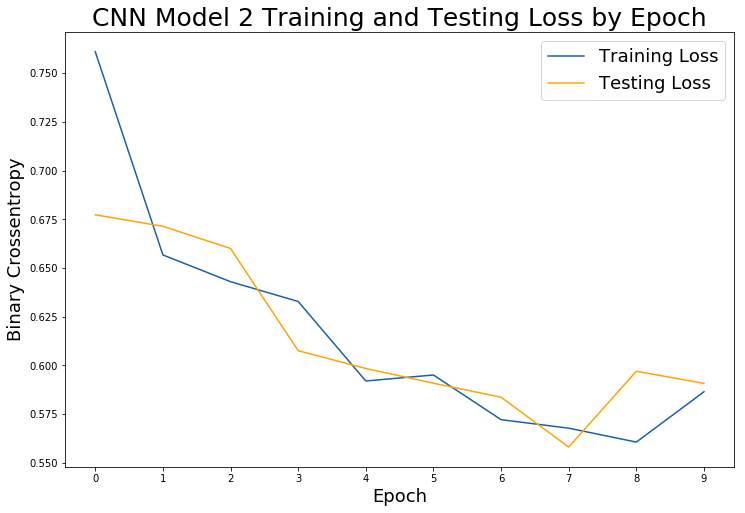

In [37]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('CNN Model 2 Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Binary Crossentropy', fontsize = 18)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

plt.legend(fontsize = 18);

This chart shows the model loss performance, it is preferable when the two lines move in tandem with a downward trajectory with little space in between the lines.

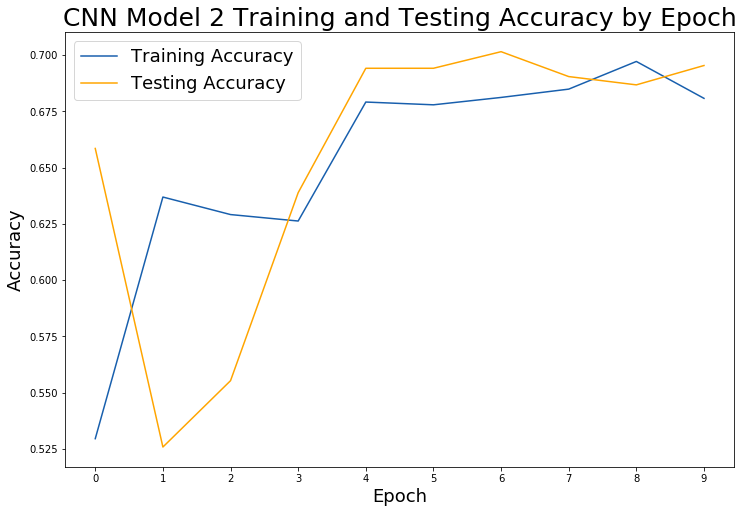

In [38]:
# Check out our train accuracy and test accuracy over epochs.
train_accuracy = history.history['acc']
test_accuracy = history.history['val_acc']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Accuracy', color='#185fad')
plt.plot(test_accuracy, label='Testing Accuracy', color='orange')

# Set title
plt.title('CNN Model 2 Training and Testing Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Accuracy', fontsize = 18)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

plt.legend(fontsize = 18);

This chart shows the model accuracy, it is preferable when the two lines move in tandem with a upward trajectory with little space in between the lines.



In [39]:
# Evaluate model on test data
cnn_2_score = cnn_model_2.evaluate(X_test, y_test, verbose=0)
cnn_2_labels = cnn_model_2.metrics_names

# Compare models.
print(f'CNN 2 {cnn_2_labels[0]}  : {cnn_2_score[0]}')
print(f'CNN 2 {cnn_2_labels[1]}   : {cnn_2_score[1]}')
print()
print(f'CNN 1 {cnn_labels[0]}  : {cnn_score[0]}')
print(f'CNN 1 {cnn_labels[1]}   : {cnn_score[1]}')
print()
print(f'FFNN {labels[0]} : {score[0]}')
print(f'FFNN {labels[1]}  : {score[1]}')

cnn_model_2.summary()

CNN 2 loss  : 0.5907792916169038
CNN 2 acc   : 0.6953316953316954

CNN 1 loss  : 0.5444101172817427
CNN 1 acc   : 0.7076167076167076

FFNN loss : 7.971192856678506
FFNN acc  : 0.5000000001464487
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 198, 6)       60        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 146, 196, 16)      880       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 73, 98, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 71, 96, 16)        2320      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 35, 48, 16)        0         
_________________________________________________________________
flatten_3 (Fl

This table shows the model's performance and a summary of the model's composition.

#### CNN Model 3

In [42]:
# Instantiate a CNN.
cnn_model_3 = Sequential()

# Add a convolutional layer.
cnn_model_3.add(Conv2D(filters = 6,         # number of filters
                     kernel_size = 3,        # height/width of filter
                     activation='relu',      # activation function 
                     input_shape=(150,200,1))) # shape of input (image)

# Add a pooling layer.
cnn_model_3.add(MaxPooling2D(pool_size=(2,2))) # dimensions of region of pooling

# Add another convolutional layer.
cnn_model_3.add(Conv2D(16,
                     kernel_size = 3,
                     activation='relu'))

# Add another pooling layer.
cnn_model_3.add(MaxPooling2D(pool_size=(2,2)))

# We have to remember to flatten to go from the "box" to the vertical line of nodes!
cnn_model_3.add(Flatten())

# Add a densely-connected layer with 64 neurons.
cnn_model_3.add(Dense(64, activation='relu'))

# Let's try to avoid overfitting!
cnn_model_3.add(Dropout(0.3))


# Add a final layer with 1 neuron.
cnn_model_3.add(Dense(1, activation='sigmoid'))

# Compile model
cnn_model_3.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

# Fit the model
epochs = 10 
batch_size = 8
history = cnn_model_3.fit(X_train,
                y_train,
                batch_size=128,
                validation_data=(X_test, y_test),
                epochs=10,
                verbose=1)

Train on 2440 samples, validate on 814 samples
Epoch 1/10
2440/2440 [==============================] - 32s 13ms/step - loss: 1.0366 - acc: 0.4902 - val_loss: 0.6960 - val_acc: 0.5000
Epoch 2/10
2440/2440 [==============================] - 31s 13ms/step - loss: 0.6837 - acc: 0.5631 - val_loss: 0.6702 - val_acc: 0.6892
Epoch 3/10
2440/2440 [==============================] - 26s 11ms/step - loss: 0.6565 - acc: 0.6295 - val_loss: 0.6419 - val_acc: 0.5762
Epoch 4/10
2440/2440 [==============================] - 23s 10ms/step - loss: 0.6309 - acc: 0.6176 - val_loss: 0.6307 - val_acc: 0.6855
Epoch 5/10
2440/2440 [==============================] - 23s 10ms/step - loss: 0.6245 - acc: 0.6156 - val_loss: 0.5934 - val_acc: 0.6953
Epoch 6/10
2440/2440 [==============================] - 23s 9ms/step - loss: 0.6200 - acc: 0.6053 - val_loss: 0.5921 - val_acc: 0.6941
Epoch 7/10
2440/2440 [==============================] - 23s 9ms/step - loss: 0.6131 - acc: 0.6197 - val_loss: 0.5739 - val_acc: 0.6904
Epo

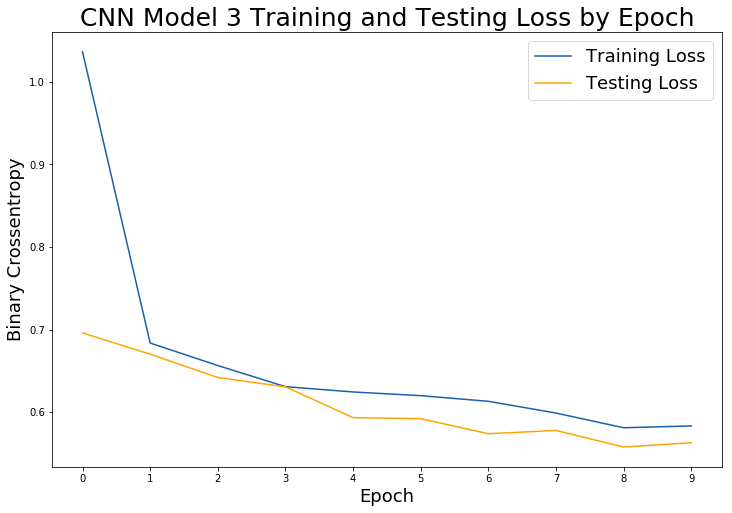

In [43]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('CNN Model 3 Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Binary Crossentropy', fontsize = 18)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

plt.legend(fontsize = 18);

This chart shows the model loss performance, it is preferable when the two lines move in tandem with a downward trajectory with little space in between the lines.

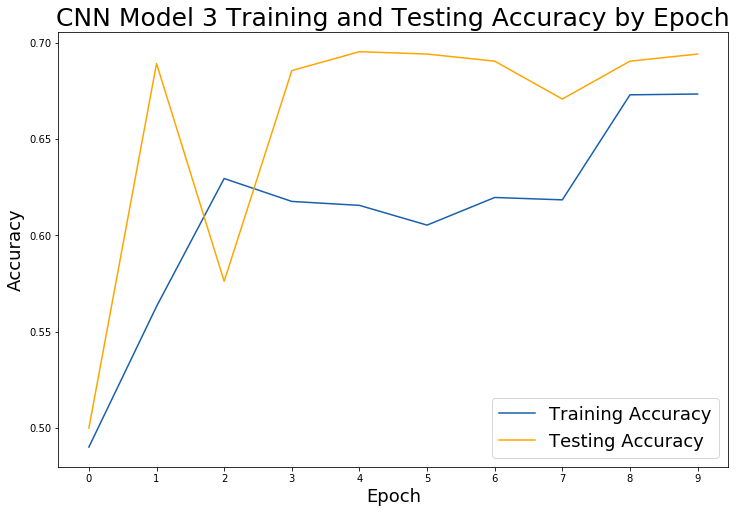

In [44]:
# Check out our train accuracy and test accuracy over epochs.
train_accuracy = history.history['acc']
test_accuracy = history.history['val_acc']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Accuracy', color='#185fad')
plt.plot(test_accuracy, label='Testing Accuracy', color='orange')

# Set title
plt.title('CNN Model 3 Training and Testing Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Accuracy', fontsize = 18)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

plt.legend(fontsize = 18);

This chart shows the model accuracy, it is preferable when the two lines move in tandem with a upward trajectory with little space in between the lines.



In [45]:
# Evaluate model on test data.
cnn_3_score = cnn_model_3.evaluate(X_test,
                                   y_test,
                                   verbose=1)

cnn_3_labels = cnn_model_3.metrics_names

# Compare models.
print(f'CNN 3 {cnn_3_labels[0]}  : {cnn_3_score[0]}')
print(f'CNN 3 {cnn_3_labels[1]}   : {cnn_3_score[1]}')
print()
print(f'CNN 2 {cnn_2_labels[0]}  : {cnn_2_score[0]}')
print(f'CNN 2 {cnn_2_labels[1]}   : {cnn_2_score[1]}')
print()
print(f'CNN 1 {cnn_labels[0]}  : {cnn_score[0]}')
print(f'CNN 1 {cnn_labels[1]}   : {cnn_score[1]}')
print()
print(f'FFNN {labels[0]} : {score[0]}')
print(f'FFNN {labels[1]}  : {score[1]}')

814/814 [==============================] - 3s 4ms/step
CNN 3 loss  : 0.5629922608485679
CNN 3 acc   : 0.6941031941031941

CNN 2 loss  : 0.5907792916169038
CNN 2 acc   : 0.6953316953316954

CNN 1 loss  : 0.5444101172817427
CNN 1 acc   : 0.7076167076167076

FFNN loss : 7.971192856678506
FFNN acc  : 0.5000000001464487


This table shows the model's performance and a summary of the model's composition.

#### CNN Model 4

In [46]:
# Instantiate a CNN.
cnn_model_4 = Sequential()

# Add a convolutional layer.
cnn_model_4.add(Conv2D(filters = 4,         # number of filters
                     kernel_size = 3,        # height/width of filter
                     activation='relu',      # activation function 
                     input_shape=(150,200,1))) # shape of input (image)
# Add another convolutional layer.
cnn_model_4.add(Conv2D(8,
                     kernel_size = 3,
                     activation='relu'))


# Add a pooling layer.
cnn_model_4.add(MaxPooling2D(pool_size=(2,2))) # dimensions of region of pooling


# Add another convolutional layer.
cnn_model_4.add(Conv2D(8,
                     kernel_size = 3,
                     activation='relu'))

# Add another pooling layer.
cnn_model_4.add(MaxPooling2D(pool_size=(2,2)))

# We have to remember to flatten to go from the "box" to the vertical line of nodes!
cnn_model_4.add(Flatten())

# Add a densely-connected layer with 64 neurons.
cnn_model_4.add(Dense(72, activation='relu'))

# Let's try to avoid overfitting!
cnn_model_4.add(Dropout(0.3))

# Add a densely-connected layer with 32 neurons.
cnn_model_4.add(Dense(16, activation='relu'))

# Let's try to avoid overfitting!
cnn_model_4.add(Dropout(0.3))

# Add a final layer with 1 neuron.
cnn_model_4.add(Dense(1, activation='sigmoid'))

# Compile model
cnn_model_4.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

# Fit the model
epochs = 10 
batch_size = 8
history = cnn_model_4.fit(X_train,
                y_train,
                batch_size=128,
                validation_data=(X_test, y_test),
                epochs=10,
                verbose=1)


Train on 2440 samples, validate on 814 samples
Epoch 1/10
2440/2440 [==============================] - 41s 17ms/step - loss: 0.6339 - acc: 0.6439 - val_loss: 0.5585 - val_acc: 0.6978
Epoch 2/10
2440/2440 [==============================] - 40s 16ms/step - loss: 0.5673 - acc: 0.6951 - val_loss: 0.5455 - val_acc: 0.7076
Epoch 3/10
2440/2440 [==============================] - 40s 16ms/step - loss: 0.5493 - acc: 0.7053 - val_loss: 0.5690 - val_acc: 0.7002
Epoch 4/10
2440/2440 [==============================] - 40s 16ms/step - loss: 0.5518 - acc: 0.7008 - val_loss: 0.5413 - val_acc: 0.7076
Epoch 5/10
2440/2440 [==============================] - 40s 17ms/step - loss: 0.5442 - acc: 0.7053 - val_loss: 0.5548 - val_acc: 0.6990
Epoch 6/10
2440/2440 [==============================] - 40s 16ms/step - loss: 0.5425 - acc: 0.7082 - val_loss: 0.5434 - val_acc: 0.7027
Epoch 7/10
2440/2440 [==============================] - 41s 17ms/step - loss: 0.5337 - acc: 0.7135 - val_loss: 0.5361 - val_acc: 0.7039
E

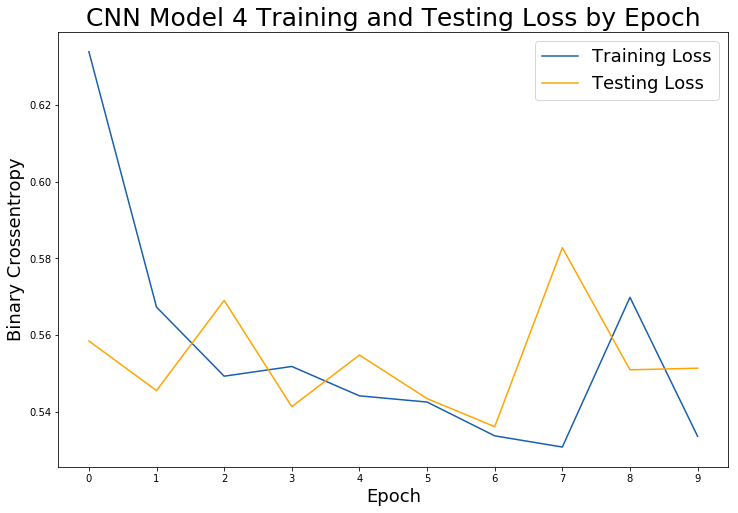

In [47]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('CNN Model 4 Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Binary Crossentropy', fontsize = 18)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

plt.legend(fontsize = 18);

This chart shows the model loss performance, it is preferable when the two lines move in tandem with a downward trajectory with little space in between the lines.

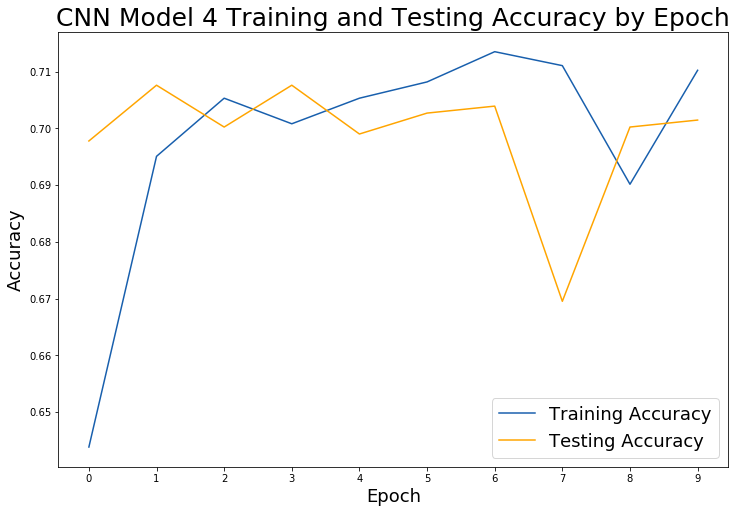

In [48]:
# Check out our train accuracy and test accuracy over epochs.
train_accuracy = history.history['acc']
test_accuracy = history.history['val_acc']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Accuracy', color='#185fad')
plt.plot(test_accuracy, label='Testing Accuracy', color='orange')

# Set title
plt.title('CNN Model 4 Training and Testing Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Accuracy', fontsize = 18)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

plt.legend(fontsize = 18);

This chart shows the model accuracy, it is preferable when the two lines move in tandem with a upward trajectory with little space in between the lines.



In [49]:
# Evaluate model on test data.
cnn_4_score = cnn_model_4.evaluate(X_test,
                                   y_test,
                                   verbose=1)

cnn_4_labels = cnn_model_4.metrics_names

# Compare models.
print(f'CNN 4 {cnn_4_labels[0]}  : {cnn_4_score[0]}')
print(f'CNN 4 {cnn_4_labels[1]}   : {cnn_4_score[1]}')
print()
print(f'CNN 3 {cnn_3_labels[0]}  : {cnn_3_score[0]}')
print(f'CNN 3 {cnn_3_labels[1]}   : {cnn_3_score[1]}')
print()
print(f'CNN 2 {cnn_2_labels[0]}  : {cnn_2_score[0]}')
print(f'CNN 2 {cnn_2_labels[1]}   : {cnn_2_score[1]}')
print()
print(f'CNN 1 {cnn_labels[0]}  : {cnn_score[0]}')
print(f'CNN 1 {cnn_labels[1]}   : {cnn_score[1]}')
print()
print(f'FFNN {labels[0]} : {score[0]}')
print(f'FFNN {labels[1]}  : {score[1]}')

814/814 [==============================] - 5s 6ms/step
CNN 4 loss  : 0.5513643202090439
CNN 4 acc   : 0.7014742014742015

CNN 3 loss  : 0.5629922608485679
CNN 3 acc   : 0.6941031941031941

CNN 2 loss  : 0.5907792916169038
CNN 2 acc   : 0.6953316953316954

CNN 1 loss  : 0.5444101172817427
CNN 1 acc   : 0.7076167076167076

FFNN loss : 7.971192856678506
FFNN acc  : 0.5000000001464487


This table shows the model's performance and a summary of the model's composition.

### CNN Model 5

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                     y,
                                                    random_state=42,
                                                    stratify=y)


In [51]:
# Instantiate a CNN.
cnn_model_5 = Sequential()

# Add a convolutional layer.

cnn_model_5.add(Conv2D(filters = 6,     # number of filters
                     kernel_size = 3, # height/width of filter
                     activation = 'relu', # activation function 
                     input_shape = (150, 200, 1))) # shape of input (image)

# dimensions of region of pooling
cnn_model_5.add(MaxPooling2D(pool_size=(2,2)))

cnn_model_5.add(Conv2D(8,
                     kernel_size = 3,
                     activation='relu'))

cnn_model_5.add(Conv2D(16,
                     kernel_size = 3,
                     activation='relu'))
# adding another of region of pooling
cnn_model_5.add(MaxPooling2D(pool_size=(2,2))) 


cnn_model_5.add(Flatten())

# Add a densely-connected layer with 128 neurons.
cnn_model_5.add(Dense(128, activation='relu'))

# Let's try to avoid overfitting!
cnn_model_5.add(Dropout(0.2))


# Add a final layer with 1 neuron.
cnn_model_5.add(Dense(1, activation='sigmoid'))

cnn_model_5.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

# Fit model on training data
history=cnn_model_5.fit(X_train,
               y_train,
              batch_size=256,
              validation_data=(X_test, y_test),        
              epochs=10,
               verbose=1)

Train on 2440 samples, validate on 814 samples
Epoch 1/10
2440/2440 [==============================] - 29s 12ms/step - loss: 0.6913 - acc: 0.5422 - val_loss: 0.6724 - val_acc: 0.5737
Epoch 2/10
2440/2440 [==============================] - 29s 12ms/step - loss: 0.6511 - acc: 0.6123 - val_loss: 0.6247 - val_acc: 0.6781
Epoch 3/10
2440/2440 [==============================] - 29s 12ms/step - loss: 0.5986 - acc: 0.6709 - val_loss: 0.5949 - val_acc: 0.6646
Epoch 4/10
2440/2440 [==============================] - 29s 12ms/step - loss: 0.5777 - acc: 0.6898 - val_loss: 0.5761 - val_acc: 0.6830
Epoch 5/10
2440/2440 [==============================] - 28s 12ms/step - loss: 0.5599 - acc: 0.6947 - val_loss: 0.5603 - val_acc: 0.6990
Epoch 6/10
2440/2440 [==============================] - 29s 12ms/step - loss: 0.5514 - acc: 0.7004 - val_loss: 0.5663 - val_acc: 0.6990
Epoch 7/10
2440/2440 [==============================] - 28s 12ms/step - loss: 0.5536 - acc: 0.6975 - val_loss: 0.5555 - val_acc: 0.7052
E

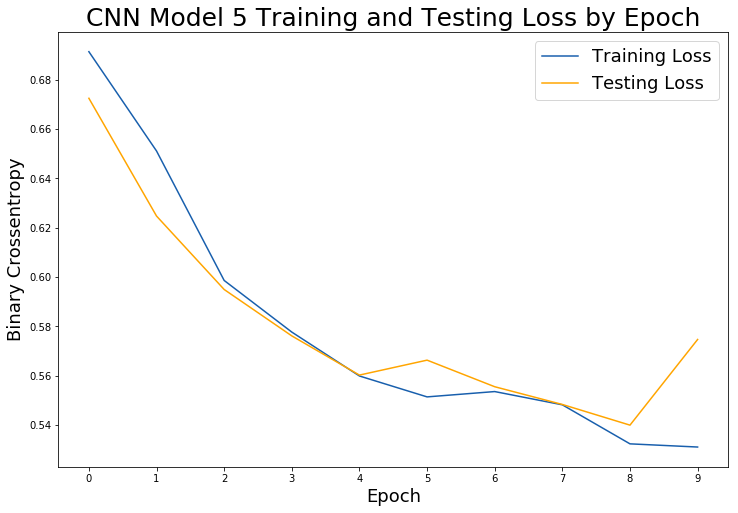

In [52]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('CNN Model 5 Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Binary Crossentropy', fontsize = 18)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

plt.legend(fontsize = 18);

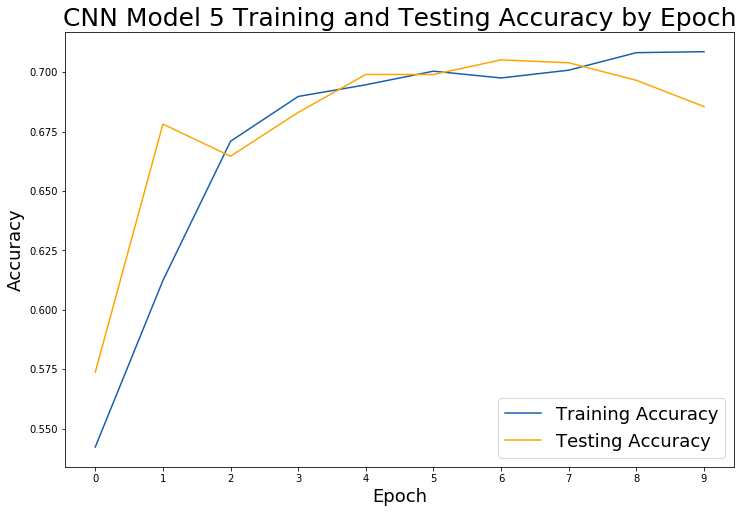

In [53]:
# Check out our train accuracy and test accuracy over epochs.
train_accuracy = history.history['acc']
test_accuracy = history.history['val_acc']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Accuracy', color='#185fad')
plt.plot(test_accuracy, label='Testing Accuracy', color='orange')

# Set title
plt.title('CNN Model 5 Training and Testing Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Accuracy', fontsize = 18)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

plt.legend(fontsize = 18);

This chart shows the model accuracy, it is preferable when the two lines move in tandem with a upward trajectory with little space in between the lines.



In [54]:
# Evaluate model on test data.
cnn_5_score = cnn_model_5.evaluate(X_test,
                                   y_test,
                                   verbose=1)

cnn_5_labels = cnn_model_5.metrics_names

# Compare models.
print(f'CNN 5 {cnn_5_labels[0]}  : {cnn_5_score[0]}')
print(f'CNN 5 {cnn_5_labels[1]}   : {cnn_5_score[1]}')
print()
print(f'CNN 4 {cnn_4_labels[0]}  : {cnn_4_score[0]}')
print(f'CNN 4 {cnn_4_labels[1]}   : {cnn_4_score[1]}')
print()
print(f'CNN 3 {cnn_3_labels[0]}  : {cnn_3_score[0]}')
print(f'CNN 3 {cnn_3_labels[1]}   : {cnn_3_score[1]}')
print()
print(f'CNN 2 {cnn_2_labels[0]}  : {cnn_2_score[0]}')
print(f'CNN 2 {cnn_2_labels[1]}   : {cnn_2_score[1]}')
print()
print(f'CNN 1 {cnn_labels[0]}  : {cnn_score[0]}')
print(f'CNN 1 {cnn_labels[1]}   : {cnn_score[1]}')
print()
print(f'FFNN {labels[0]} : {score[0]}')
print(f'FFNN {labels[1]}  : {score[1]}')

814/814 [==============================] - 4s 4ms/step
CNN 5 loss  : 0.5746848165842473
CNN 5 acc   : 0.6855036855036855

CNN 4 loss  : 0.5513643202090439
CNN 4 acc   : 0.7014742014742015

CNN 3 loss  : 0.5629922608485679
CNN 3 acc   : 0.6941031941031941

CNN 2 loss  : 0.5907792916169038
CNN 2 acc   : 0.6953316953316954

CNN 1 loss  : 0.5444101172817427
CNN 1 acc   : 0.7076167076167076

FFNN loss : 7.971192856678506
FFNN acc  : 0.5000000001464487


This table shows the model's performance and a summary of the model's composition.